<a href="https://colab.research.google.com/github/ieltaleb/Reservoir_Calcs/blob/main/Standing_Brine_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install CoolProp

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:


# Function to convert Fahrenheit to Kelvin
def fahrenheit_to_kelvin(temp_F):
    return (temp_F + 459.67) * 5/9

# Temperature range in Fahrenheit
temperature_range_F = range(40, 401,10)

# Pressure range in psi
pressure_range_psi = [1000,5000,10000]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Temperature (°F)'] + [f'Density at {pressure} psi (kg/m³)' for pressure in pressure_range_psi])

# Calculate density for each temperature and pressure
for temp_F in temperature_range_F:
    temp_K = fahrenheit_to_kelvin(temp_F)
    density_values = [temp_F]

    for pressure_psi in pressure_range_psi:
        pressure_Pa = pressure_psi * 6894.76  # Convert psi to Pascals
        density = CP.PropsSI('D', 'T', temp_K, 'P', pressure_Pa, 'Water')
        density_values.append(density*0.062428)

    results = results.append(pd.Series(density_values, index=results.columns), ignore_index=True)




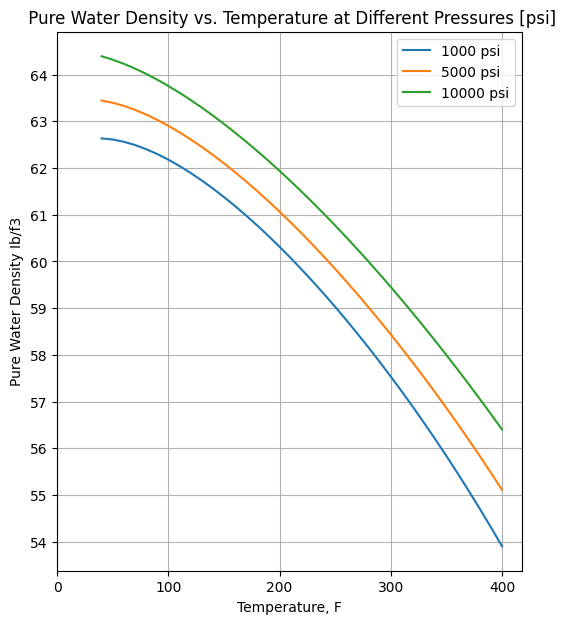

In [4]:
results.columns=['x','smoothed_density_1000psi','smoothed_density_5000psi','smoothed_density_10000psi']
import matplotlib.pyplot as plt
# Extract density values for different pressures
x=results['x']
density_1000psi = results['smoothed_density_1000psi']
density_5000psi = results['smoothed_density_5000psi']
density_10000psi = results['smoothed_density_10000psi']

custom_y_ticks = np.arange(54, 65, 1)
custom_x_ticks = np.arange(0, 401, 100)


plt.figure(figsize=(6, 7))

# Plot density at different pressures on the same axis

plt.plot(x, density_1000psi, label='1000 psi')
plt.plot(x, density_5000psi, label='5000 psi')
plt.plot(x, density_10000psi, label='10000 psi')

plt.yticks(custom_y_ticks)
plt.xticks(custom_x_ticks)

# Set plot labels and legend
plt.xlabel('Temperature, F')
plt.ylabel('Pure Water Density Ib/f3')
plt.title(' Pure Water Density vs. Temperature at Different Pressures [psi]')
plt.legend()

# Show the plot
plt.grid()
plt.show()

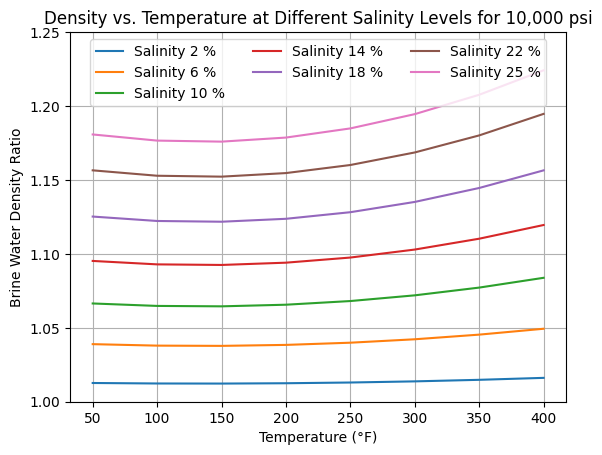

In [5]:
import matplotlib.pyplot as plt

# Pressure in psi
pressure = 10000

# Temperature in Fahrenheit
Temp_list = [50, 100, 150, 200, 250, 300, 350, 400]

# Salinity in ppm
ppm_list = [2, 6, 10, 14, 18, 22, 25]

# Initialize a dictionary to store density values for different salinity levels
density_data = {}

# Define the Rho function (replace with your actual implementation)
import CoolProp.CoolProp as CP
import pandas as pd
#Conversion from psi to Pascal
def psi_pa(Pressure):
    return (Pressure *6894.76)
#Conversion from Fahrenheit to Kelvin
def F_to_kelvin(temp):
    return (temp + 459.67) * 5/9
def Rho(ppm,Temp,Pressure):
    import CoolProp.CoolProp as CP
    A=7.65e-3;
    B=1.09e-7;
    C=2.16e-5;
    D=1.74e-9;
    E=1.07e-5;
    F=3.24e-10;
    G=3.76e-8;
    H=1.0e-12;
    #Conversion from Fahrenheit to Kelvin
    Cs=ppm*1e-4
    Temp_K=F_to_kelvin(Temp)
    Pressure_pa=psi_pa(Pressure)
    Rhow = CP.PropsSI('D', 'T', Temp_K, 'P', Pressure_pa, 'Water')
    Rho=(Cs*(A-B*Pressure+Cs*(C+D*Pressure)-(E-F*Pressure)*Temp+(G-H*Pressure)*Temp*Temp)+1)
    return (Rho)

# Calculate density values for different combinations of ppm and Temp
for ppm in ppm_list:
    density_values = [Rho(ppm * 1e4, Temp, pressure) for Temp in Temp_list]
    density_data[ppm] = density_values

# Create a plot for each salinity level
for ppm in ppm_list:
    plt.plot(Temp_list, density_data[ppm], label=f'Salinity {ppm} %')
custom_y_ticks = np.arange(1.0, 1.27, 0.05)
plt.yticks(custom_y_ticks)

plt.xlabel('Temperature (°F)')
plt.ylabel('Brine Water Density Ratio')
plt.legend(ncol=3, loc='upper center')
plt.title('Density vs. Temperature at Different Salinity Levels for 10,000 psi')
plt.grid(True)
plt.show()


In [6]:

#Conversion from psi to Pascal
def psi_pa(Pressure):
    return (Pressure *6894.76)
#Conversion from Fahrenheit to Kelvin
def F_to_kelvin(temp):
    return (temp + 459.67) * 5/9
def Rho(ppm,Temp,Pressure):

    A=7.65e-3;
    B=1.09e-7;
    C=2.16e-5;
    D=1.74e-9;
    E=1.07e-5;
    F=3.24e-10;
    G=3.76e-8;
    H=1.0e-12;
    #Conversion from Fahrenheit to Kelvin
    Cs=ppm*1e-4
    Temp_K=F_to_kelvin(Temp)
    Pressure_pa=psi_pa(Pressure)
    Rhow = CP.PropsSI('D', 'T', Temp_K, 'P', Pressure_pa, 'Water')
    Rho=(Cs*(A-B*Pressure+Cs*(C+D*Pressure)-(E-F*Pressure)*Temp+(G-H*Pressure)*Temp*Temp)+1)*Rhow
    return (Rho*0.0625420834501102)


# Pressure in psi
Pressure_list = [100, 250, 500, 750, 1000, 1500, 2000, 2416.81, 2500, 3000, 3500, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Temperature in Fahrenheit
Temp = 200

# Salinity in ppm
ppm = 60000

# Calculate density values using the Rho function
density_values = [Rho(ppm, Temp, pressure) for pressure in Pressure_list]

# Create a DataFrame
df = pd.DataFrame({'Pressure': Pressure_list, 'Density': density_values})

# Display the DataFrame
print(df)


    Pressure    Density
0     100.00  62.827237
1     250.00  62.854274
2     500.00  62.899129
3     750.00  62.943728
4    1000.00  62.988075
5    1500.00  63.076022
6    2000.00  63.162994
7    2416.81  63.234766
8    2500.00  63.249012
9    3000.00  63.334100
10   3500.00  63.418277
11   4000.00  63.501564
12   5000.00  63.665543
13   6000.00  63.826185
14   7000.00  63.983623
15   8000.00  64.137986
16   9000.00  64.289391
17  10000.00  64.437948
